# Part II - Loan Analysis
## by Mtisunge Tupochere Malemia

## Investigation Overview


> the goal of the analysis is to investigate the question **What type of borrowers are prefred by lending institutions in America?**

### Summary of key insights
> 1. the debt to income ratio largely, is between 0 and 0.5. 
> 2. The most common reasons for taking loans is debt consolidation
> 3. There is no big difference between those that own homes and those that dont in terms of the amount of loan they can get
> 4. the lower the prosper score the higher the interest
> 5. there is a linear relationship between the monthly income and monthly payment. 
> 6. Loans with past due payments of up to 120 days were also given low prosper score
> 7. Borrowers earning more than 100,000 have a high loan score regardless of wether they or they do not own a home
> 8. New Hampshire is the state with the highest loan amount, while Iowa and North Dakota states have the lowest loan amounts 
> 9. High income earners who own a home have access to larger loans. 


## Dataset Overview

> The prosper dataset is financial dataset that hasinformation on loans, borrowers, lenders, interest rates, reasons for borrowing, payment amount, payment period etc. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. in this project we analyse this data inorder to find different patterns that exist in the dataset. All analysis is done in python and presented in an HTML format.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
df = pd.read_csv('prosperLoanData.csv')


In [10]:
#copying selected features to new dataframe
df2 = df[['Term','LoanStatus','BorrowerRate','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatusDuration','EmploymentStatus','IsBorrowerHomeowner','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount', 'MonthlyLoanPayment']].copy()


In [11]:
#Renaming the ListingCategory (numeric colum) to "ListingCategory"
df2.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)


In [12]:
#building a dictionary of values for the ListCategory column and mapping then to the numeric values
ListCategory_dic = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
df2.ListingCategory = df2.ListingCategory.map(ListCategory_dic )



## (Visualization 1)
>This plot shows how the loan scores of borrowers related to the interest rate rate given for the loan


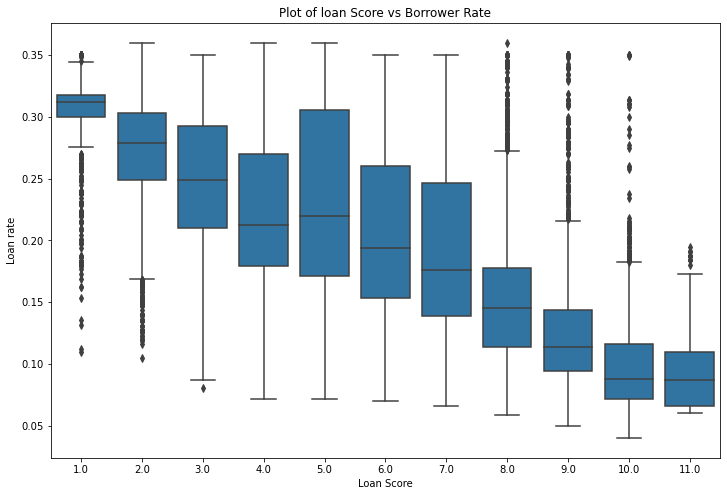

In [14]:
default_color = sb.color_palette()[0]
plt.figure(figsize = [12, 8])
sb.boxplot(data = df2, x = 'ProsperScore', y = 'BorrowerRate', color = default_color);
plt.title("Plot of loan Score vs Borrower Rate");
plt.xlabel("Loan Score");
plt.ylabel("Loan rate");


### Observation
the lower the prosper score the higher the interest. This means that at prosper borrowers with a lower loan score are given high interest. This could be because the lender will want to make less losses if the loan goes bad.

## (Visualization 2)

> the plot below show how different borrowers were rated (prosper loan score) in relation to how much they earn. This gives an idea of which borrowers are highly rated which means they are more likely to be be preferred when getting a loan

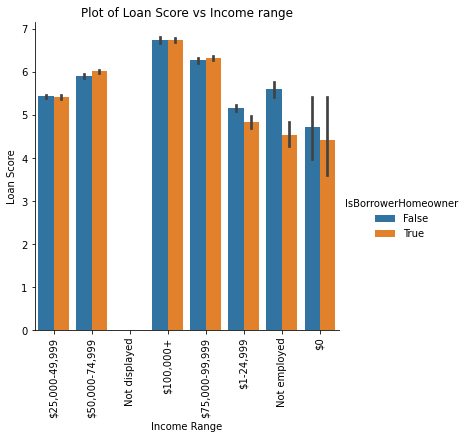

In [18]:


sb.catplot(data=df2, x="IncomeRange", y="ProsperScore", hue="IsBorrowerHomeowner", kind="bar")
plt.xticks(rotation=90);
plt.title("Plot of Loan Score vs Income range");
plt.xlabel("Income Range");
plt.ylabel("Loan Score");

### Observation
Borrowers earning more than 1000. 000 dollars are also highly rated when getting loans. This makes business sense because those that earn alot are most likely to pay off their loans in time. However theres is no difference in rating between home owners and non home owners that earn the same amount. 

## (Visualization 3)

> The visualization below shows how borrowers with different income ranges differ in terms of how much loans they have access to. an extra layer of wether the borrowers are home owners or not has been added for further analysis



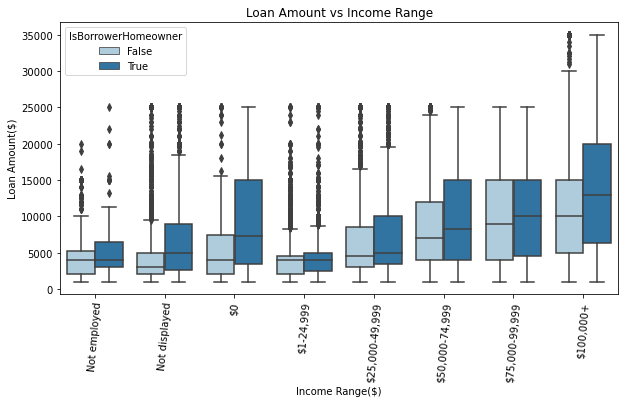

In [17]:
plt.figure(figsize=(10, 5))
income_ordered = ["Not employed","Not displayed","$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]
df2['IncomeRangeOrdered'] = pd.Categorical(df2['IncomeRange'], categories=income_ordered, ordered=True)
sb.boxplot(data=df2, x='IncomeRangeOrdered', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired');
plt.xticks(rotation=85);
plt.xlabel('Income Range($)');
plt.ylabel('Loan Amount($)');
plt.title('Loan Amount vs Income Range');

## (Visualization 4)
> the visualization below shows that borrowers taking a bigger loans, with longer terms are preffered if they are home owners.

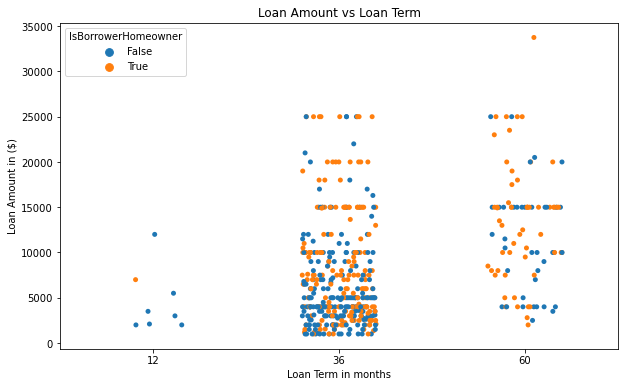

In [15]:
plt.figure(figsize = [10, 6])

sb.stripplot(data = df2.sample(500, random_state=1), x = 'Term', y = 'LoanOriginalAmount', hue='IsBorrowerHomeowner', jitter=0.2);
plt.xlabel('Loan Term in months');
plt.ylabel('Loan Amount in ($)');
plt.title('Loan Amount vs Loan Term');

### Observation
1. from the plot high income earners who own a home have access to larger loans. In all income ranges home owners are have access to bogger loan than non home owners. This shows that home owners are preffered to be given loans than those who do not own a home.

In [3]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt